
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 80 </p>
## <p style="text-align: center;">Due: November 9, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Matthew Leong
2. Chirag Ramesh

### My Contribution:

I focused on the decision tree and classification report questions (2,4). Chirag handled the other ones and we both worked on peer reviewing our class supplements together.

# Question 1 (20 pts) - Principal Component Analysis

Download dataset from [this link](https://drive.google.com/file/d/1U6FDSQQSUzvw3Ygtgp8I5ea0-dL-orSE/view?usp=sharing).


In this problem we will be applying PCA on the Lending Club loan dataset. A simplified version of the dataset with reduced number of samples. Please use the dataset in the above link. We will use reduced number of features and only two classes as shown below.

In [1]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the csv file and fill Nan/empty values as 0
dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

# We will be using only two classes and group them as below
def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

# Set of features which indicate the dimensionality of the data
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]

#For simplicity, in this question, we select all columns that do not contain integer of float type of data. Then, one hot encoding is performed.
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)

df.shape

# We select the `loan_status` column as the target column.  

C:\Users\mattl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(226067, 161)

Use Principal Component Analysis (PCA) to solve this problem.  

* **1.1 (1 pt)** Perform the following steps to prepare the dataset:

    * Select the 'loan_status' column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 25% data in test set and random_state = 42

    * Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    Note: X should have 160 features.
    

* **1.2 (8 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X to the following components: 100, 30, 10. For each of the three models, print the percentage(%) of variance captured by each of the compnonets and plot the scree plot the [scree plot]
(https://www.kindsonthegenius.com/principal-components-analysispca-in-python-step-by-step/).  (PCA should be fit only on X_train).


* **1.3 (5 pts)** Train LogisticRegression(random_state=4,max_iter=10000) with the full dimension X and each of the redued dimension X from PCA in the previous step (100, 30 and 10 dimensions). Print the classification reports for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (Note: you will be training logistic regression 4 times (160, 100, 30 and 10 dimensional X) and will print 4 classification reports)


* **1.4 (4 pts)** [Plot](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) the ROC curves for all models (trained using dataset containing all dimensions and dataset containing reduced dimensions, total 4 models). ROC curve is used to study the classifier's output. Details on ROC can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html).


* **1.5 (2 pts)** What do you observe from the ROC curves? 

# ANSWER

### 1.1

In [2]:
#set Xs and Y, split data
y = df['loan_status'].values
X = df.drop(['loan_status'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

#Performing min-max scaling
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
X # we can see that X has 160 features


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,18.24,9.0,1.0,4341,...,1,0,0,0,0,0,1,0,1,0
1,30000,30000,30000.0,18.94,777.23,90000.0,26.52,13.0,1.0,12315,...,1,0,0,0,0,0,1,0,1,0
2,5000,5000,5000.0,17.97,180.69,59280.0,10.51,8.0,0.0,4599,...,1,0,0,0,0,0,1,0,1,0
3,4000,4000,4000.0,18.94,146.51,92000.0,16.74,10.0,0.0,5468,...,1,0,0,0,0,0,1,0,1,0
4,30000,30000,30000.0,16.14,731.78,57250.0,26.35,12.0,0.0,829,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,20000,20000,20000.0,22.35,767.44,55000.0,20.49,8.0,0.0,14442,...,0,0,0,0,0,0,1,0,1,0
226063,10000,10000,10000.0,6.67,307.27,52000.0,24.65,27.0,0.0,19319,...,1,0,0,0,0,0,1,0,1,0
226064,13000,13000,13000.0,7.21,402.66,90000.0,4.08,15.0,0.0,18394,...,1,0,0,0,0,0,1,0,1,0
226065,10000,10000,10000.0,18.94,366.26,33280.0,31.61,13.0,0.0,17177,...,1,0,0,0,0,0,1,0,1,0


### 1.2

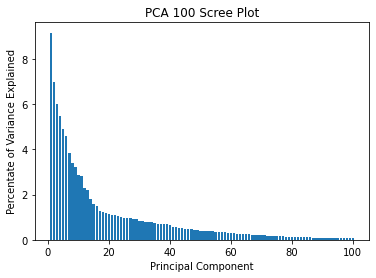

The percentage of variance captured by each component is 
 [9.17082119 6.99971575 6.02589021 5.48989425 4.92126831 4.59775726
 3.85181561 3.38804923 3.2150326  2.88061821 2.81953987 2.29388169
 2.2207015  1.81506747 1.57670488 1.49458232 1.26754512 1.2262638
 1.1802938  1.16388147 1.09824821 1.08200897 1.05308167 1.01445219
 0.97228646 0.96448067 0.94866012 0.92494468 0.91344465 0.84436517
 0.83207147 0.81085962 0.79798218 0.79262794 0.75341884 0.71117759
 0.69874763 0.6946323  0.69082124 0.66287992 0.58470142 0.56386785
 0.53160026 0.50776262 0.49148929 0.48995033 0.48219288 0.44845559
 0.44692678 0.4021699  0.39106379 0.3832751  0.37587354 0.36581935
 0.36368889 0.35514385 0.34676433 0.33472889 0.32012344 0.30835358
 0.27886389 0.25902673 0.24722146 0.24525374 0.24335679 0.2419016
 0.23329124 0.22715652 0.20685638 0.20465513 0.1966822  0.18560974
 0.16978367 0.165289   0.16117032 0.14984591 0.14572035 0.14411213
 0.14167096 0.13657597 0.13110187 0.12917168 0.12786669 0.12089028
 0.11

In [3]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

PCA_100= PCA(n_components=100)
PCA_100_train = PCA_100.fit_transform(X_train)
PCA_100_test = PCA_100.transform(X_test)
percent_variance = np.round(PCA_100.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,101), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA 100 Scree Plot')
plt.show()
print("The percentage of variance captured by each component is \n",PCA_100.explained_variance_ratio_*100)


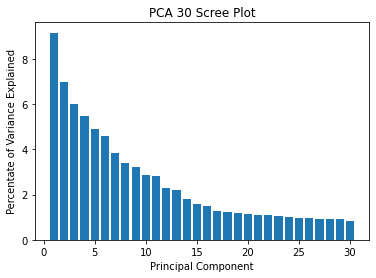

The percentage of variance captured by each component is 
 [9.17082119 6.99971575 6.0258902  5.48989423 4.9212682  4.59775723
 3.85181548 3.38804884 3.21503178 2.88061656 2.8195366  2.29386953
 2.22069294 1.81500383 1.57659504 1.49422797 1.26683515 1.22423519
 1.17884798 1.16265047 1.0957024  1.08143424 1.05194416 1.00230886
 0.96773001 0.96302523 0.9367984  0.92246332 0.90772357 0.83406599]


In [4]:
PCA_30= PCA(n_components=30)
PCA_30_train = PCA_30.fit_transform(X_train)
PCA_30_test = PCA_30.transform(X_test)
percent_variance = np.round(PCA_30.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,31), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA 30 Scree Plot')
plt.show()
print("The percentage of variance captured by each component is \n",PCA_30.explained_variance_ratio_*100)


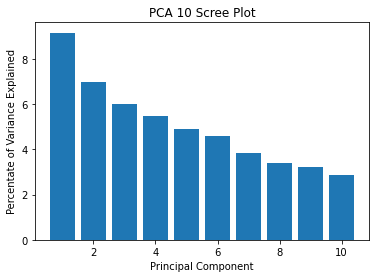

The percentage of variance captured by each component is 
 [9.17082119 6.99971575 6.02589021 5.48989425 4.92126831 4.59775726
 3.85181559 3.38804915 3.21503216 2.88061741]


In [5]:
PCA_10= PCA(n_components=10)
PCA_10_train = PCA_10.fit_transform(X_train)
PCA_10_test = PCA_10.transform(X_test)
percent_variance = np.round(PCA_10.explained_variance_ratio_* 100, decimals =2)
plt.bar(x= range(1,11), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA 10 Scree Plot')
plt.show()
print("The percentage of variance captured by each component is \n",PCA_10.explained_variance_ratio_*100)


### 1.3

In [6]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

Full160 = LogisticRegression(random_state=4,max_iter=10000).fit(X_train, y_train)
y_predict = Full160.predict(X_test)
print(classification_report(y_test, y_predict, labels=[0,1])) 


              precision    recall  f1-score   support

           0       0.76      0.46      0.57       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.88      0.73      0.78     56517
weighted avg       0.99      0.99      0.99     56517



In [7]:
PCA100_Est = LogisticRegression(random_state=4,max_iter=10000).fit(PCA_100_train, y_train)
y_predict = PCA100_Est.predict(PCA_100_test)
print(classification_report(y_test, y_predict, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.71      0.21      0.33       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.85      0.61      0.66     56517
weighted avg       0.98      0.99      0.98     56517



In [8]:
PCA30_Est = LogisticRegression(random_state=4,max_iter=10000).fit(PCA_30_train, y_train)
y_predict = PCA30_Est.predict(PCA_30_test)
print(classification_report(y_test, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.30      0.05      0.08       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.64      0.52      0.54     56517
weighted avg       0.98      0.98      0.98     56517



In [9]:
PCA10_Est = LogisticRegression(random_state=4,max_iter=10000).fit(PCA_10_train, y_train)
y_predict = PCA10_Est.predict(PCA_10_test)
print(classification_report(y_test, y_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       850
           1       0.98      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.49      0.50      0.50     56517
weighted avg       0.97      0.98      0.98     56517



C:\Users\mattl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1.4

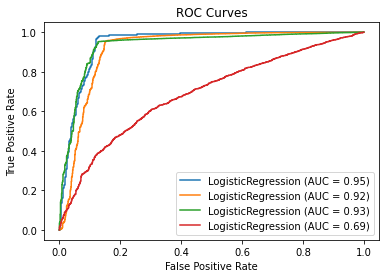

In [10]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
Full160_plot = plot_roc_curve(Full160, X_test, y_test, ax=ax)
PCA100_Est_plot = plot_roc_curve(PCA100_Est, PCA_100_test, y_test, ax=ax)
PCA30_Est_plot = plot_roc_curve(PCA30_Est, PCA_30_test, y_test, ax=ax)
PCA10_Est_plot = plot_roc_curve(PCA10_Est, PCA_10_test, y_test, ax=ax)
plt.title('ROC Curves')
plt.show()


### 1.5


The logistic regression with all of the 160 features, PCA 100, and PCA 30 all seem to have similar a similar ROC curve. However, the PCA 10 model differs from them and has the lowest AUC meaning that it has a lower probability of ranking a random positive example more highly than a random negative example. The PCA 10 model has a high false positive rate and low true positive rate. 

# Question 2 (20 pts)- Decision Tree Classifier
Download dataset from [this link](https://drive.google.com/file/d/1iWh0gF2bXOYSnuq843qLxnFphT1HN-lq/view?usp=sharing).

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [2]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [3]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [4]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [5]:
bank_data.deposit_cat

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_cat, Length: 11162, dtype: int64

In [15]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,5,10,20 and max depth using gini and entropy criterion; report the train and test error. Refer [Decisison Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree. Name this tree model as `dt2`.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve using `dt2`.


# Answer 2
## (a)

In [16]:
#Generate trees
gini_tree2 = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 2)
gini_tree2 = gini_tree2.fit(X_train,Y_train)
entropy_tree2 = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
entropy_tree2 = entropy_tree2.fit(X_train,Y_train)

gini_tree5 = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 5)
gini_tree5 = gini_tree5.fit(X_train,Y_train)
entropy_tree5 = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
entropy_tree5 = entropy_tree5.fit(X_train,Y_train)

gini_tree10 = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 10)
gini_tree10 = gini_tree10.fit(X_train,Y_train)
entropy_tree10 = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 10)
entropy_tree10 = entropy_tree10.fit(X_train,Y_train)

gini_tree20 = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 20)
gini_tree20 = gini_tree20.fit(X_train,Y_train)
entropy_tree20 = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 20)
entropy_tree20 = entropy_tree20.fit(X_train,Y_train)


#Generate prediction and display output
gini_tree2_trpred = gini_tree2.predict(X_train)
print("Training Accuracy for gini tree with max depth 2:", metrics.accuracy_score(Y_train,gini_tree2_trpred))
gini_tree2_tepred = gini_tree2.predict(X_test)
print("Testing Accuracy for gini tree with max depth 2:", metrics.accuracy_score(Y_test,gini_tree2_tepred))
entropy_tree2_trpred = entropy_tree2.predict(X_train)
print("Training Accuracy for entropy tree with max depth 2:", metrics.accuracy_score(Y_train,entropy_tree2_trpred))
entropy_tree2_tepred = entropy_tree2.predict(X_test)
print("Testing Accuracy for entropy tree with max depth 2:", metrics.accuracy_score(Y_test,entropy_tree2_tepred))
#empty print statement to make output look neater.
print('')

gini_tree5_trpred = gini_tree5.predict(X_train)
print("Training Accuracy for gini tree with max depth 5:", metrics.accuracy_score(Y_train,gini_tree5_trpred))
gini_tree5_tepred = gini_tree5.predict(X_test)
print("Testing Accuracy for gini tree with max depth 5:", metrics.accuracy_score(Y_test,gini_tree5_tepred))
entropy_tree5_trpred = entropy_tree5.predict(X_train)
print("Training Accuracy for entropy tree with max depth 5:", metrics.accuracy_score(Y_train,entropy_tree5_trpred))
entropy_tree5_tepred = entropy_tree5.predict(X_test)
print("Testing Accuracy for entropy tree with max depth 5:", metrics.accuracy_score(Y_test,entropy_tree5_tepred))
print('')

gini_tree10_trpred = gini_tree10.predict(X_train)
print("Training Accuracy for gini tree with max depth 10:", metrics.accuracy_score(Y_train,gini_tree10_trpred))
gini_tree10_tepred = gini_tree10.predict(X_test)
print("Testing Accuracy for gini tree with max depth 10:", metrics.accuracy_score(Y_test,gini_tree10_tepred))
entropy_tree10_trpred = entropy_tree10.predict(X_train)
print("Training Accuracy for entropy tree with max depth 10:", metrics.accuracy_score(Y_train,entropy_tree10_trpred))
entropy_tree10_tepred = entropy_tree10.predict(X_test)
print("Testing Accuracy for entropy tree with max depth 10:", metrics.accuracy_score(Y_test,entropy_tree10_tepred))
print('')

gini_tree20_trpred = gini_tree20.predict(X_train)
print("Training Accuracy for gini tree with max depth 20:", metrics.accuracy_score(Y_train,gini_tree20_trpred))
gini_tree20_tepred = gini_tree20.predict(X_test)
print("Testing Accuracy for gini tree with max depth 20:", metrics.accuracy_score(Y_test,gini_tree20_tepred))
entropy_tree20_trpred = entropy_tree20.predict(X_train)
print("Training Accuracy for entropy tree with max depth 20:", metrics.accuracy_score(Y_train,entropy_tree20_trpred))
entropy_tree20_tepred = entropy_tree20.predict(X_test)
print("Testing Accuracy for entropy tree with max depth 20:", metrics.accuracy_score(Y_test,entropy_tree20_tepred))

Training Accuracy for gini tree with max depth 2: 0.7285250307985217
Testing Accuracy for gini tree with max depth 2: 0.7268248992386923
Training Accuracy for entropy tree with max depth 2: 0.7119498264083324
Testing Accuracy for entropy tree with max depth 2: 0.7089117778772951

Training Accuracy for gini tree with max depth 5: 0.7976257139657297
Testing Accuracy for gini tree with max depth 5: 0.7760859829825347
Training Accuracy for entropy tree with max depth 5: 0.7998656064508903
Testing Accuracy for entropy tree with max depth 5: 0.7783251231527094

Training Accuracy for gini tree with max depth 10: 0.8634785530294545
Testing Accuracy for gini tree with max depth 10: 0.7859381997313032
Training Accuracy for entropy tree with max depth 10: 0.8500391981184903
Testing Accuracy for entropy tree with max depth 10: 0.7895208240035826

Training Accuracy for gini tree with max depth 20: 0.9840967633553589
Testing Accuracy for gini tree with max depth 20: 0.7393640841916704
Training Accur

## (b)



As we increase the depth of the tree, training accuracy and test accuracy both rise up until depth 10. However as we move on to depth 20, we start overfitting. Although the training accuracy rises, the testing accuracy falls due to the latter reaason.

# (c)

duration               0.849306
poutcome_success       0.150694
recent_pdays           0.000000
job_self-employed      0.000000
balance                0.000000
campaign               0.000000
previous               0.000000
default_cat            0.000000
housing_cat            0.000000
loan_cat               0.000000
job_admin.             0.000000
job_blue-collar        0.000000
job_entrepreneur       0.000000
job_housemaid          0.000000
job_management         0.000000
job_retired            0.000000
job_services           0.000000
poutcome_unknown       0.000000
job_student            0.000000
job_technician         0.000000
job_unemployed         0.000000
job_unknown            0.000000
marital_divorced       0.000000
marital_married        0.000000
marital_single         0.000000
education_primary      0.000000
education_secondary    0.000000
education_tertiary     0.000000
education_unknown      0.000000
poutcome_failure       0.000000
poutcome_other         0.000000
age     

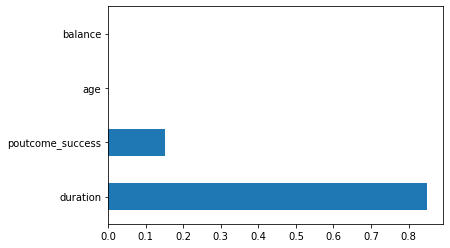

In [17]:
dt2 = gini_tree2
#Make a dataframe to help illustrate output
#As it's a depth two tree, only expect two features to be important.

feature_importances = pd.Series(dt2.feature_importances_, index=X.columns)

#Plot showcases 4.
feature_importances.nlargest(4).plot(kind='barh')

#List out the values to show that the rest are 0.
feature_importances.sort_values(ascending = False)

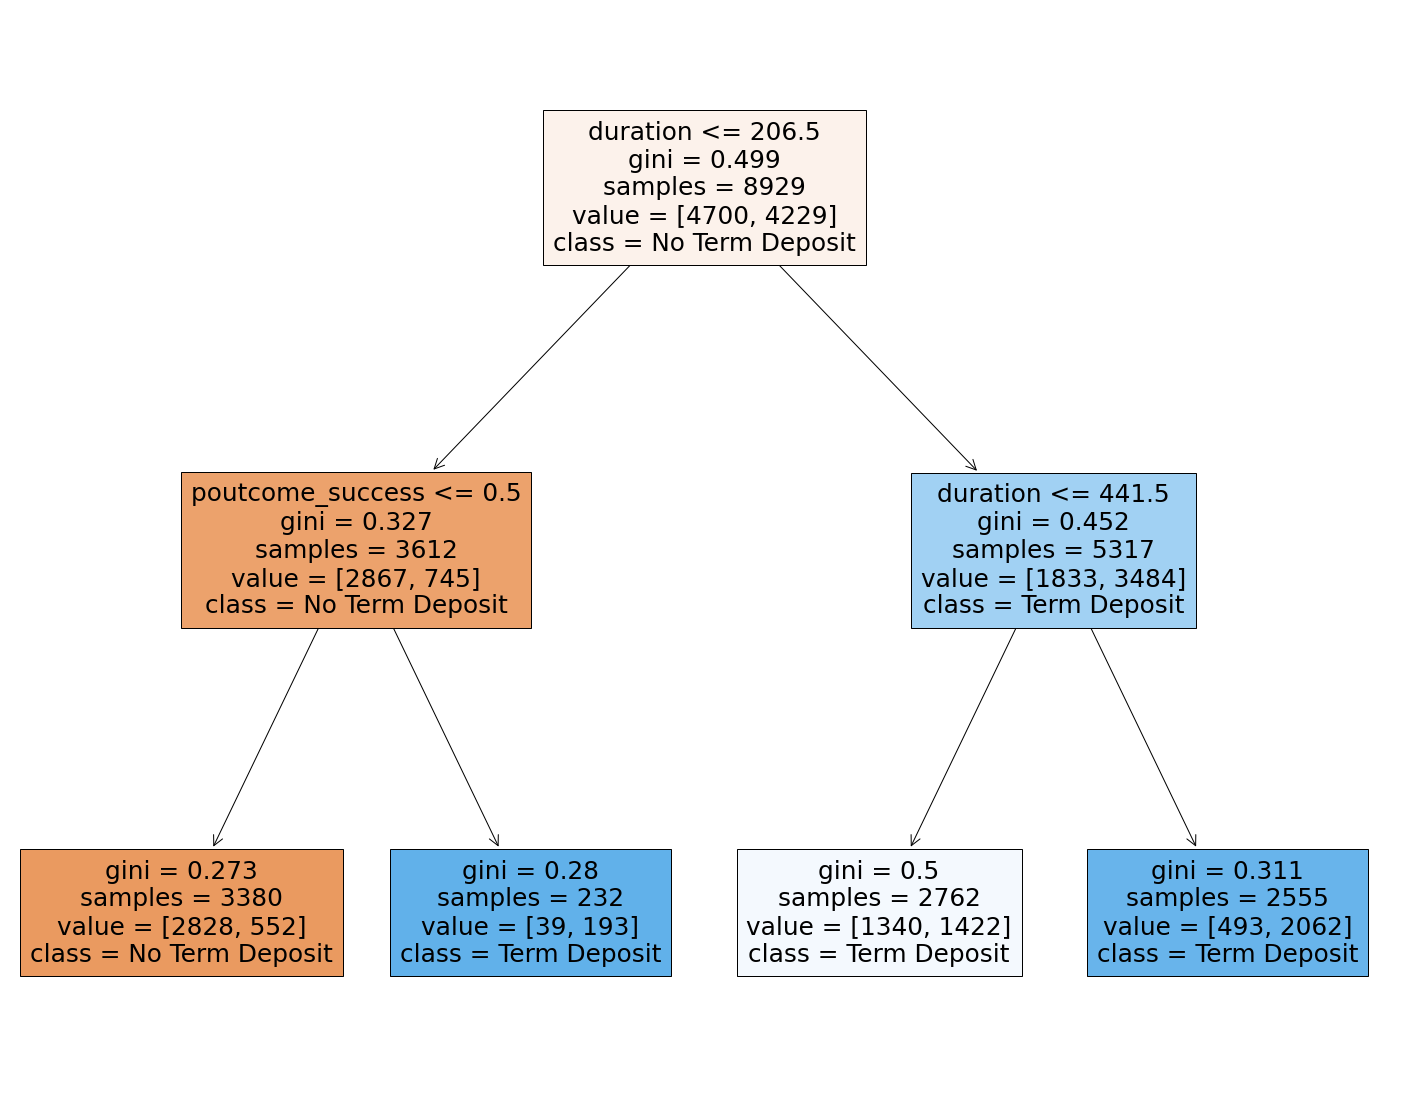

In [18]:
#Graphviz does not work.
#Elected to visualize using sklearn package instead.

#dt2.classes_
#Looked at dt2.class_ to see how it was classified. 
#First value is 0 meaning no term deposit. Second value of 1 meaning Term Deposit.       
#Entered accordingly in the class_names for the graph.
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt2, 
               feature_names = X.columns,
               class_names = ["No Term Deposit","Term Deposit"],
                   filled=True)
plt.show()

## (d)

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [20]:
#Did it for practice.
#metrics.confusion_matrix(Y_test, gini_tree2_tepred)
#fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(Y_test, gini_tree2_tepred)

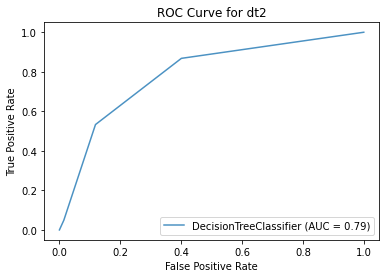

In [21]:
plot_roc_curve(dt2, X_test, Y_test, alpha=0.8)
plt.title('ROC Curve for dt2')
plt.show()

In [22]:
print("The accuracy for the test data is", metrics.accuracy_score(Y_test,gini_tree2_tepred))

The accuracy for the test data is 0.7268248992386923


# Question 3 (15 pts) - Pipeline Implementation from Sklearn 

In this question we will build a pipeline to streamline the ML Workflow. Instead of writing code for each logic, pipelines allow to make modeling easy by removing repeated operations. Generally we define the structure of the pipeline, to include the following steps, data pre-processing, feature selection, model building. 

**Part A (5 pts)**

 * Load the dataset from "vehicle.csv". The target variable is denoted by column_name = 'class'. Print the label class,and perform [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) on them using sklearn.preprocessing.LabelEncoder.

 * Seperate the dataset into features,labels. Split the dataset into train and test set with 20% data in test set and random_state = 50

**Part B (5 pts)**

Now, we will build [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the following steps. Remeber to fit the pipeline on training set and predict on test set. Finally report the classification accuracy on the test set.

 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * Model : Use DecisionTreeClassifier with default values
  

**Part C (5 pts)**
  
In part C, we will build on top of the previous part B. In addition to the three steps we will add PCA to the pipeline and use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best parameters for PCA(number of components) and DecisionTree(max_depth).
  
 * Data Pre-processing : Using SimpleImputer with strategy = 'mean'
 * Standardization : Standardize features by removing the mean and scaling to unit variance using StandardScaler()
 * PCA : Use PCA()
 * Model : Use DecisionTreeClassifier with default values
  
We will now use [GridSearchCV] with default values(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to estimate best parameters for pca(n_components = [5,8,10]) and Decision Tree (max_depth = [3,5,15]) using the pipeline designed. 

* **Hint:** The `param_grid` argument to gridsearch will be given as `{param_grid={'clf__max_depth': [3, 5, 15], 'pca__n_components': [5, 8, 10]}}`. 

Print the best parameters found by gridsearch. Finally, update the best parameters to the pipeline using pipe_pca.set_params("best params from gridsearchCV"), and report the classification accuracy on test set.

              

## Part A

In [23]:
from sklearn import preprocessing
df=pd.read_csv('vehicle.csv')
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [24]:
label_enc = preprocessing.LabelEncoder()
# The target variable is "class"
label_enc.fit(df['class'])
df['class']=label_enc.fit_transform(df['class'])

X = df.drop('class', 1)
Y = df['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)


## Part B

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipe = Pipeline(steps=[
    ('simple imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),('DTClassifier', DecisionTreeClassifier())
])
pipe.fit(X_train, Y_train)
print(classification_report(Y_test, pipe.predict(X_test)))
print(pipe.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.95      0.90      0.93        91
           2       0.84      0.95      0.89        39

    accuracy                           0.92       170
   macro avg       0.91      0.92      0.91       170
weighted avg       0.92      0.92      0.92       170

0.9176470588235294


## Part C

In [26]:
from sklearn.model_selection import GridSearchCV
Newpipe = Pipeline(steps=[
    ('simple imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),('pca', PCA()),('DTClassifier', DecisionTreeClassifier())])

param_grid = {
        'DTClassifier__max_depth': [3, 5, 15],
        'pca__n_components': [5, 8, 10],
}


grid_search = GridSearchCV(Newpipe, param_grid=param_grid)

grid_search.fit(X_train, Y_train)
print('The best paramaters for Decision tree and PCA are', grid_search.best_params_)

The best paramaters for Decision tree and PCA are {'DTClassifier__max_depth': 15, 'pca__n_components': 10}


In [27]:
Newpipe.set_params(DTClassifier__max_depth=15, pca__n_components=10)
Newpipe.fit(X_train, Y_train)
print(classification_report(Y_test, Newpipe.predict(X_test)))
print(Newpipe.score(X_test, Y_test))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        40
           1       0.88      0.89      0.89        91
           2       0.74      0.79      0.77        39

    accuracy                           0.83       170
   macro avg       0.81      0.80      0.80       170
weighted avg       0.83      0.83      0.83       170

0.8294117647058824


# Question 4 (15pts) - Reject option

Consider a binary classification problem with the following loss matrix - where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$

Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ where c = 1

Loss of choosing $C_1$:
$$
0P(C_1|x) + 2(1-P(C_1|x)) = 2-2P(C_1|x)
$$
Loss of choosing $C_2$:
$$
3P(C_1|x) + 0(1-P(C_1|x)) = 3P(C_1|x)
$$
Loss of choosing to reject:
$$
cP(C_1|x)+c(1-P(C_1|x)) = c = 1
$$


Decision boundary of $C_1$ and Reject:
$$
\begin{eqnarray*}
2-2P(C_1|x) &=& 1 \\
P(C_1|x) &=& \frac{1}{2}
\end{eqnarray*}
$$
Decision boundary of $C_2$ and Reject:
$$
\begin{eqnarray*}
3P(C_1|x) &=& 1 \\
P(C_1|x) &=& \frac{1}{3}
\end{eqnarray*}
$$
Decision boundary of $C_1$ and $C_2$:
$$
\begin{eqnarray*}
2-2P(C_1|x) &=& 3P(C_1|x) \\
P(C_1|x) &=& \frac{2}{5}
\end{eqnarray*}
$$

Notably the decision boundaries have the following relationship $\frac{1}{3} < \frac{2}{5} < \frac{1}{2}$. This makes it easier to visualize the decision boundaries and where to choose certain classes.  
Since the loss function for choosing class 2 is lower at the beginning, we **choose class 2 for $P(C_1|x) < \frac{1}{3}$**  
  
We **choose to reject in the range $\frac{1}{3}<\frac{1}{2}$** as the rejection loss is a constant 1 while the other two losses are higher in that range. 
  
For **$P(C_1|x) > \frac{1}{2}$ we choose class 1** as that minimizes loss.  
  
Lastly, we are indifferent between rejecting and choosing $C_2$ for $\frac{1}{3}$ and we are indifferent between choosing $C_1$ and rejecting for $\frac{1}{2}$  
  
We can confirm this analysis with the following plot:

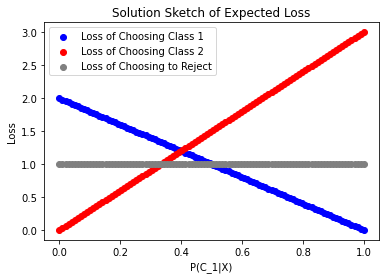

In [28]:
#use np.linspace to create an array to graph various probability values
prob = np.linspace(0,1,100)

#Define loss functions
c1_loss = 2-2*prob
c2_loss = 3*prob
reject_loss = np.ones(len(prob))

#Make a scatterplot
plt.scatter(prob,c1_loss,color = 'blue', label = 'Loss of Choosing Class 1')
plt.scatter(prob,c2_loss,color = 'red', label = 'Loss of Choosing Class 2')
plt.scatter(prob,reject_loss,color = 'grey', label ='Loss of Choosing to Reject')
plt.title('Solution Sketch of Expected Loss')
plt.xlabel('P(C_1|X)')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Question 5: Supplementary Notes (10 points)
Visit the [Supplementary Notes website](https://ideal-ut.github.io/APM-2020/). Read the notes written by your peers from both sections (7th topic onwards, i.e. "stochastic gradient descent" onwards). Select the note that you liked the most and write the following:
- Identify the note. (e.g., If you liked the note from Section A for topic 7, write 7A).
- Write one-two paragraphs on why you liked your selection the most and what you learnt from it.
- Also write a short paragraph on how you think this note can be further improved.

Again for note criteria judging, we are basing it off of the following criteria. 1. Presentation, 2. Time it takes to understand the note, 3. Brevity, 4. Covering material not in lecture, 5. Amount of depth fit in the note. With this criteria, we enjoyed looking at **14B**. The note had excellent visualizations overall and also kept the language clean and concise in such a way that a heavy math background is not required. It also elaborates more on questions present in lecture such as differentiating between PCA and Linear Regression. Overall, it was excellent under our criteria. The only thing that we would add in are some more supplemental resources. 